In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
path = 'datasets/REPORT-8.csv' ## this is the report for P on l001
l001_P = pd.read_csv(path, parse_dates=['Collection_Date'])
nvars = l001_P['Test Name'].unique() # variable names
nvars

array(['PHOSPHATE, ORTHO AS P', 'PHOSPHATE, TOTAL AS P',
       'PHOSPHATE, DISSOLVED AS P'], dtype=object)

In [3]:
l001_P.head()

,Project Code,Station ID,Sample ID,First Trigger Date,Collection_Date,Sample Type New,Collection Method,Depth,Depth Unit,Matrix,...,Filtration Date,Sample Type,QC Type,Discharge,Up/Down Stream,Weather Code,Program Type,NDEC,Sample Comments,Result Comments
0,Y,L001,0044,NaN,1972-12-11 00:00:00,SAMP,G,0.0,NaN,SW,...,NaN,0,NaN,0,0,0,MON,3,NaN,NaN
1,Y,L001,0045,NaN,1972-12-11 00:00:00,SAMP,G,2.0,NaN,SW,...,NaN,0,NaN,0,0,0,MON,3,NaN,NaN
2,Y,L001,0044,NaN,1972-12-11 00:00:00,SAMP,G,0.0,NaN,SW,...,NaN,0,NaN,0,0,0,MON,3,NaN,NaN
3,Y,L001,0045,NaN,1972-12-11 00:00:00,SAMP,G,2.0,NaN,SW,...,NaN,0,NaN,0,0,0,MON,3,NaN,NaN
4,Y,L001,0076,NaN,1973-02-05 16:05:00,SAMP,G,0.0,NaN,SW,...,NaN,0,NaN,0,0,0,MON,3,NaN,NaN


In [4]:
l001_P.dtypes

Project Code                  object
Station ID                    object
Sample ID                     object
First Trigger Date           float64
Collection_Date       datetime64[ns]
Sample Type New               object
Collection Method             object
Depth                        float64
Depth Unit                    object
Matrix                        object
Test Number                    int64
Test Name                     object
Storet Code                  float64
Method                        object
Measure Date                  object
Value                        float64
Sigfig Value                 float64
Uncertainty                   object
MDL                          float64
PQL                          float64
RDL                          float64
Units                         object
Remark Code                   object
Flag                         float64
Receive Date                  object
LIMS Number                   object
Collection Agency             object
S

In [5]:
path = 'datasets/REPORT-10.csv' # Report for P and N in l004
l004 = pd.read_csv(path, parse_dates=['Collection_Date'])

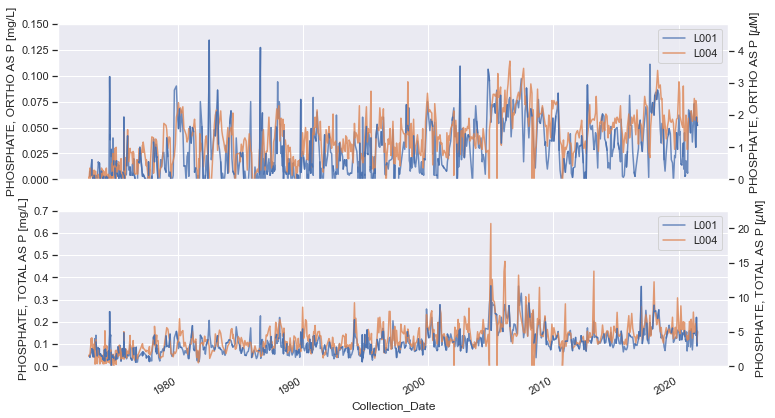

In [6]:
fig, axes = plt.subplots(2,1, figsize=(12,7), sharex=True)
ylims = ([.15, .7]) # upper limits for y axis
for var, ax, lim in zip(nvars[:-1], axes, ylims):
    sub = l001_P.where(l001_P['Test Name']==var)
    sub.plot(x='Collection_Date', y='Value', ax=ax, label='L001', alpha=.8)
    ax.set_ylabel(var+' [mg/L]')
    ax.set_ylim(0, lim)
    
    sub2 = l004.where(l004['Test Name']==var)
    sub2.plot(x='Collection_Date', y='Value', ax=ax, label='L004', alpha=.8)
    
    ax2 = ax.twinx()
    var2 = sub['Value']/.031
    ax2.plot(sub['Collection_Date'], var2)
    ax2.set_ylabel(var+r' [$\mu$M]')
    ax2.grid(None)
    ax2.set_ylim(0, lim/.031)

# fig.suptitle('L001', )
# df.where(df['Test Name']==var).plot(x='Collection_Date', y='Value', ax=axes[0])
# df.where(df['Test Name']==var).plot(x='Collection_Date', y='Value', ax=axes[0])

In [8]:
path = 'datasets/REPORT-9.csv' # Report for N in l001
l001_N = pd.read_csv(path, parse_dates=['Collection_Date'])
nvars2 = l001_N['Test Name'].unique()
nvars2

array(['NITRATE-N', 'TOTAL NITROGEN'], dtype=object)

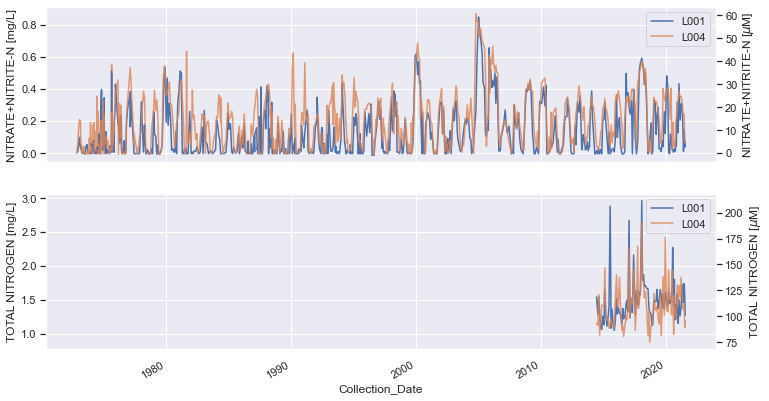

In [52]:
fig, axes = plt.subplots(2,1, figsize=(12,7), sharex=True)
ylims = ([.7, 3])
for var, ax, lim in zip(['NITRATE+NITRITE-N', 'TOTAL NITROGEN'], axes, ylims):
    sub = l001.where(l001['Test Name']==var)
    sub.plot(x='Collection_Date', y='Value', ax=ax, label='L001')
    ax.set_ylabel(var+' [mg/L]')
#     ax.set_ylim(0, lim)
    
    sub2 = l004.where(l004['Test Name']==var)
    sub2.plot(x='Collection_Date', y='Value', ax=ax, label='L004', alpha=.8)
    
    ax2 = ax.twinx()
    var2 = sub['Value']/.014
    ax2.plot(sub['Collection_Date'], var2)
    ax2.set_ylabel(var+r' [$\mu$M]')
    ax2.grid(None)
#     ax2.set_ylim(0, lim/.014)

In [10]:
from datetime import datetime

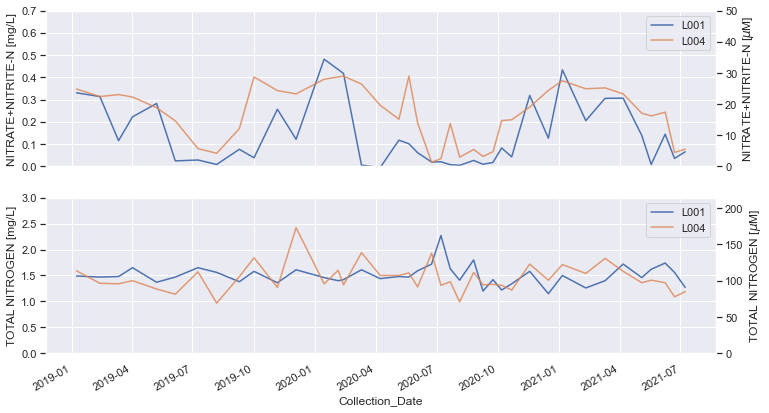

In [53]:
year = 2018

fig, axes = plt.subplots(2,1, figsize=(12,7), sharex=True)
ylims = ([.7, 3])
for var, ax, lim in zip(['NITRATE+NITRITE-N', 'TOTAL NITROGEN'], axes, ylims):
    sub = l001.where((l001['Test Name']==var) & (l001['Collection_Date'].dt.year>year))
    sub.plot(x='Collection_Date', y='Value', ax=ax, label='L001')
    ax.set_ylabel(var+' [mg/L]')
    ax.set_ylim(0, lim)
    
    sub2 = l004.where((l004['Test Name']==var) & (l004['Collection_Date'].dt.year>year))
    sub2.plot(x='Collection_Date', y='Value', ax=ax, label='L004', alpha=.8)
    
    ax2 = ax.twinx()
    var2 = sub['Value']/.014
    ax2.plot(sub['Collection_Date'], var2)
    ax2.set_ylabel(var+r' [$\mu$M]')
    ax2.grid(None)
    ax2.set_ylim(0, lim/.014)

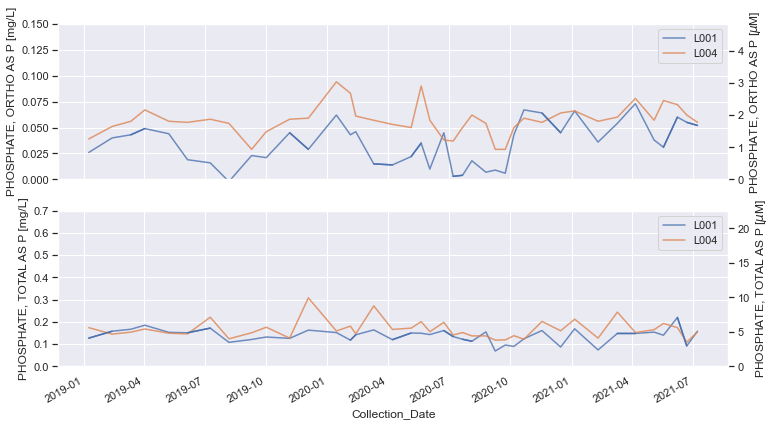

In [20]:
fig, axes = plt.subplots(2,1, figsize=(12,7), sharex=True)
ylims = ([.15, .7]) # upper limits for y axis
for var, ax, lim in zip(nvars[:-1], axes, ylims):
    sub = l001_P.where((l001_P['Test Name']==var) & (l001_P['Collection_Date'].dt.year>year))
    sub.plot(x='Collection_Date', y='Value', ax=ax, label='L001', alpha=.8)
    ax.set_ylabel(var+' [mg/L]')
    ax.set_ylim(0, lim)
    
    sub2 = l004.where((l004['Test Name']==var) & (l004['Collection_Date'].dt.year>year))
    sub2.plot(x='Collection_Date', y='Value', ax=ax, label='L004', alpha=.8)
    
    ax2 = ax.twinx()
    var2 = sub['Value']/.031
    ax2.plot(sub['Collection_Date'], var2)
    ax2.set_ylabel(var+r' [$\mu$M]')
    ax2.grid(None)
    ax2.set_ylim(0, lim/.031)

In [21]:
path = 'datasets/REPORT-11.csv' ## this is the report for P on l001
l001_Chl = pd.read_csv(path, parse_dates=['Collection_Date'])
nvars = l001_Chl['Test Name'].unique() # variable names
nvars

array(['CHLOROPHYLL-A', 'CHLOROPHYLL-A, CORRECTED', 'CHLOROPHYLL-A(LC)'],
      dtype=object)

In [32]:
path = 'datasets/REPORT-12.csv' ## this is the report for P on l001
l004_Chl = pd.read_csv(path, parse_dates=['Collection_Date'])
nvars = l001_Chl['Test Name'].unique() # variable names
nvars

array(['CHLOROPHYLL-A', 'CHLOROPHYLL-A, CORRECTED', 'CHLOROPHYLL-A(LC)'],
      dtype=object)

<AxesSubplot:xlabel='Collection_Date'>

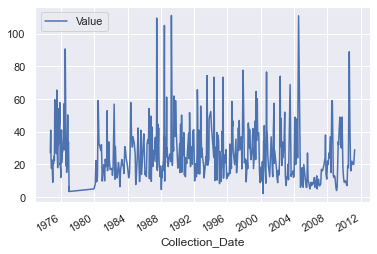

In [29]:
l001_Chl[l001_Chl['Test Name']==nvars[0]].plot(x='Collection_Date', y='Value')

<AxesSubplot:xlabel='Collection_Date'>

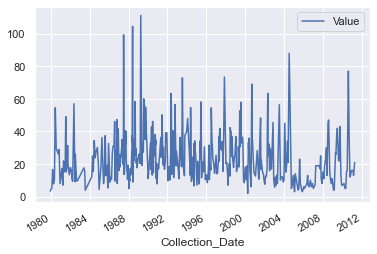

In [30]:
l001_Chl[l001_Chl['Test Name']==nvars[1]].plot(x='Collection_Date', y='Value')

Text(0, 0.5, 'CHLOROPHYLL-A [$\\mu$g/L]')

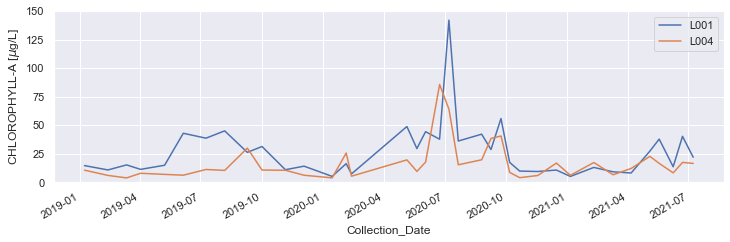

In [34]:

fig, ax = plt.subplots(figsize=(12,3.5))
l001_Chl[(l001_Chl['Test Name']=='CHLOROPHYLL-A(LC)') & ((l001_Chl['Collection_Date'].dt.year>year))].plot(x='Collection_Date', y='Value', ax=ax, label='L001')
l004_Chl[(l004_Chl['Test Name']=='CHLOROPHYLL-A(LC)') & ((l004_Chl['Collection_Date'].dt.year>year))].plot(x='Collection_Date', y='Value', ax=ax, label='L004')
ax.set_ylim(0, 150)
ax.set_ylabel('CHLOROPHYLL-A [$\mu$g/L]')

In [35]:
import cutecharts.charts as ctc

#from cutecharts.globals import use_jupyter_lab; use_jupyter_lab() #for jupyter lab

In [37]:
l1=l001_Chl[(l001_Chl['Test Name']=='CHLOROPHYLL-A(LC)') & ((l001_Chl['Collection_Date'].dt.year>year))]
l4=l004_Chl[(l004_Chl['Test Name']=='CHLOROPHYLL-A(LC)') & ((l004_Chl['Collection_Date'].dt.year>year))]
chart = ctc.Line("Chlorophyll a $\mu$g/L")
chart.set_options(
 labels=list(l1['Collection_Date']), 
 x_label="Date",
 y_label="Chlorophyll a $\mu$g/L",
 colors=['#EA5F89'])
chart.add_series("l001", list(l1['Value'])) 
chart.render_notebook()

TypeError: Object of type Timestamp is not JSON serializable

In [49]:
# path = '/Users/hboi/Downloads/REPORT-L001_all.csv'# this is the report for P on l001
# l001 = pd.read_csv(path, parse_dates=['Collection_Date'])
path = '/Users/hboi/Downloads/REPORT-L004_all.csv'# this is the report for P on l001
l004 = pd.read_csv(path, parse_dates=['Collection_Date'])

In [46]:
l001.columns[[16,17,25,37]]

Index(['Sigfig Value', 'Uncertainty', 'LIMS Number', 'Filtration Date'], dtype='object')

In [48]:
l001['Test Name'].unique()

array(['Temperature', 'CARBON, DISSOLVED ORGANIC', 'DISSOLVED OXYGEN',
       'SP CONDUCTIVITY, FIELD', 'PH, FIELD', 'NITRATE+NITRITE-N',
       'NITRITE-N', 'AMMONIA-N', 'KJELDAHL NITROGEN, TOTAL',
       'PHOSPHATE, ORTHO AS P', 'PHOSPHATE, TOTAL AS P', 'SILICA',
       'POTASSIUM', 'CALCIUM', 'MAGNESIUM', 'CHLORIDE',
       'HARDNESS AS CACO3', 'IRON, DISSOLVED', 'CHROMIUM, DISSOLVED',
       'NICKEL, DISSOLVED', 'CARBON, TOTAL', 'CARBON, TOTAL INORGANIC',
       'ALKALINITY, TOT, CACO3', 'NITRATE-N', 'SECCHI DISK DEPTH',
       'SODIUM', 'NET PRIMARY PROD. VOLUME', 'GROSS PRIMARY PROD. VOL.',
       'RESP. PLANKTONIC VOLUME', 'TURBIDITY', 'STRONTIUM, DISSOLVED',
       'IRON, TOTAL', 'PH, LAB', 'LEAD, DISSOLVED', 'SULFATE',
       'CADMIUM, DISSOLVED', 'COPPER, DISSOLVED', 'MANGANESE, DISSOLVED',
       'ZINC, DISSOLVED', 'VOLATILE SUSPENDED SOLIDS',
       'FIXED SUSPENDED SOLIDS', 'TOTAL SUSPENDED SOLIDS',
       'KJELDAHL NITROGEN, DIS', 'PHOSPHATE, DISSOLVED AS P',
       'CHLO